In [13]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [5]:
# Splitting training and test datasets
x = df.drop('variety', axis=1)
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
# Normalization

sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Model building
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [10]:
# Evaluation 
prediction_train= mlp_clf.predict(X_train_scaled)

print('Accuracy in TRAINING: {:.2f}'.format(accuracy_score(y_train, prediction_train)))


Accuracy in TRAINING: 1.00


In [11]:
# Evaluation TRST 
prediction_test= mlp_clf.predict(X_test_scaled)

print('Accuracy in TEST: {:.2f}'.format(accuracy_score(y_test, prediction_test)))


Accuracy in TEST: 1.00


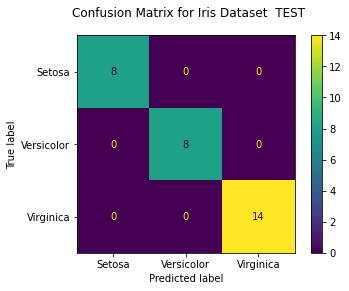

In [14]:
fig = plot_confusion_matrix(mlp_clf, X_test_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset  TEST")
plt.show()

In [16]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00         8
   Virginica       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



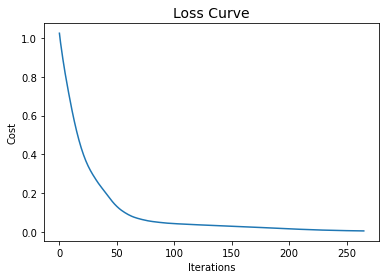

In [17]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [18]:
# Not necessary  Possible overfitting. Very simple case

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [20]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [21]:
# best model selected

model_final = grid.best_estimator_
model_final

prediction_train= model_final.predict(X_train_scaled)

In [27]:
print("weights between input and first hidden layer:")
print(model_final.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(model_final.coefs_[1])

weights between input and first hidden layer:
[[-0.07033114  0.04058332 -0.10709423 -0.07699168  0.01256991  0.07737661
  -0.12211304  0.19312948  0.16377059 -0.10218311 -0.02778391 -0.01425558
   0.15567638 -0.06218039  0.07772426 -0.11345817 -0.05408182 -0.03934228
  -0.13094651  0.08230956  0.12813247 -0.17673135 -0.07065211 -0.05600415
  -0.01853279  0.079492    0.0263002   0.04217286 -0.19203382 -0.07523689
  -0.02975118 -0.0932132  -0.0480699  -0.16591697  0.17158444 -0.01967452
  -0.09271056 -0.14859555 -0.04162164  0.09105152  0.09587823 -0.13618921
   0.09206103 -0.21871369 -0.0610604   0.02856863  0.07501846  0.10353625
  -0.16552255 -0.18895869 -0.11545016 -0.02469127 -0.16402589 -0.00072662
  -0.18717874  0.085107    0.15356635  0.08518036  0.06885244  0.10234377
   0.02962415  0.04306249 -0.16574836 -0.05798881 -0.04617779  0.19475724
   0.010854   -0.12026693 -0.05757857  0.00385227  0.08529616  0.12543251
   0.06143749 -0.01522905  0.10237146 -0.13252973  0.08290385 -0.1

In [22]:
prediction_test = model_final.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, prediction_test)))

Accuracy: 1.00


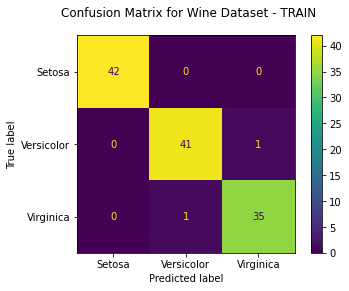

In [23]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(model_final, X_train_scaled, y_train, display_labels=model_final.classes_)
fig.figure_.suptitle("Confusion Matrix for Wine Dataset - TRAIN")
plt.show()

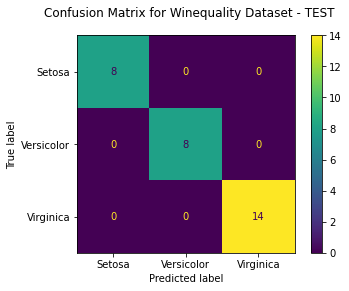

In [24]:
fig = plot_confusion_matrix(model_final, X_test_scaled, y_test, display_labels=model_final.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset - TEST")
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00         8
   Virginica       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



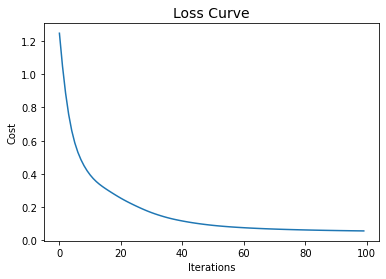

In [26]:
plt.plot(model_final.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()